# Machine Learning Exercise 2
Χατζηγιανέλλης Ιγνάτιος
Α.Μ.: MTN1915

### Προετοιμασία περιβάλλοντος
Φορτώνουμε βιβλιοθήκες και το dataset μας

In [0]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

In [0]:
url = 'https://raw.githubusercontent.com/MSc-in-Data-Science/class_material/master/semester_1/Machine_Learning/datasets/digit_recognizer_dataset.csv'
data = pd.read_csv(url)

### Ανάλυση και προετοιμασία δεδομένων
Κοιτώντας τα στατιστικά από τα δεδομένα, φαίνεται πως οι κλάσεις εμφανίζονται με μια ομοιόμορφη κατανομή,
καθώς επίσης δεν υπάρχουν κενά features

In [0]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [0]:
data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

Διαχωρίζουμε από τα data το label στη μεταβλητή y και κρατάμε τα υπόλοιπα στη μεταβλητή X

In [0]:
X = data.drop('label', axis=1)
y = data.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

Κάνοντας ένα plot των labels, φαίνεται πως η κατανομή τους είναι αρκετά ομοιόμορφη με την κλάση για τον αριθμό 1 να υπερέχει ελάχιστα. Παρ'όλα αυτά αντιπροσωπεύονται σε πολύ καλό βαθμό όλες οι κλάσεις.

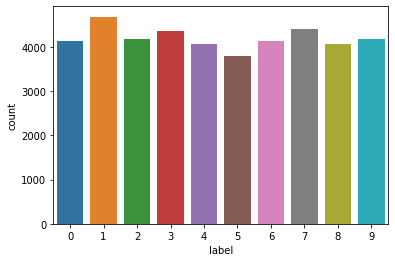

In [0]:
sns.countplot(y)
plt.show()

Κάνοντας μια ανάλυση PCA παρατηρούμε ότι ακόμα και μειώνοντας τις διαστάσεις των features κοντά στις 200 από 784, μπορούμε να κρατήσουμε κοντά στο 95% τη διακύμανση από τα αρχικά δεδομένα

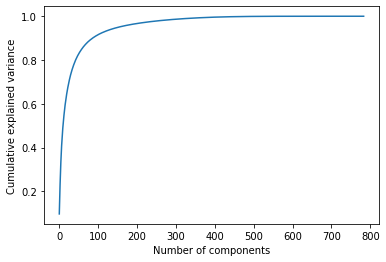

In [4]:
pca = PCA().fit(X)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

In [0]:
pca = PCA(n_components=200)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

### Επιλογή αλγορίθμου και μετρικών
Από τη στιγμή που έχουμε ένα classification πρόβλημα, οι γνωστές μετρικές που μπορούμε να αξιοποιήσουμε για το evaluation των μοντέλων μας είναι το precision, recall και κυριώς ο συνδυασμός τους, το F1 Score.

Ξεκινώντας με την αναζήτηση του κατάλληλου αλγορίθμιου για την εκπαίδευση του μοντέλου, δοκιμάζουμε την αποτελεσματικότητα 5 διαφορετικών αλγορίθμων, των Logistic Regression, KNN, Decision Trees, Naive Bayes και SVM. Κρατάμε τα μοντέλα σε απλή μορφή ώστε να δούμε την αρχική τους απόδοση, να κάνουμε μια αρχική εκτίμηση του προβλήματος και να επιλέξουμε με ποιά θα συνεχίσουμε.

In [0]:
models = []
models.append(('LR',  LogisticRegression()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC()))

In [0]:
scoring = 'f1_micro'

Αφού μαζέψαμε όλους τους υποψήφιους αλγορίθμους, τους τρέξαμε με τα ίδια κριτήρια και επομένως εφαρμόσαμε 5-Fold Cross Validation και παρατηρήθηκαν τα εξής αποτελέσματα


*   Ο Naive Bayes λόγω της αρχής ανεξαρτησίας των χαρακτηριστικών δεν κατάφερε να βρει καλό αποτέλεσμα
*   Οι KNN και Logistic Regression τα πήγαν αρκετά καλά αλλά όχι τόσο όσο άλλοι σε επίπεδο χρόνου και αποτελεσματικότητας
*   Ο SVM τα πήγε πολύ καλά και με μικρή διακύμανση στα πιθανά accuracies, επομένως σίγουρα θα είναι υποψήφιος
*   Τα Decision Trees, αν και πολύ απλά καθώς και επιρρεπή στο overfitting με τόσα χαρακτηριστικά, τα πήγαν αρκετά καλά, οπότε στη συνέχεια θα μελετήσουμε μια πιο εύρωστη εκδοχή τους, τα Random Forests





In [0]:
results = []
names   = []
for name, model in models:
  cv_results = cross_val_score(model, X, y, cv=5, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print("%03s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


 LR: 0.915881 (+/- 0.001925)
kNN: 0.965857 (+/- 0.002287)
 DT: 0.854452 (+/- 0.003033)
 NB: 0.557262 (+/- 0.003288)
SVM: 0.975524 (+/- 0.001371)


Ξεκινώντας με τα Random Forest, μιας και η παραμετροποίησή τους είναι σχετικά μεγάλη, φτιάχνουμε ενα grid με πιθανές τιμές για βασικές παραμέτρους και εφαρμόζουμε Randomized Search Cross Validation ώστε να έχουμε ένα περιορίσουμε λίγο μερικές από αυτές σε μια καλή αρχή.

Δυστυχώς ο χρόνος που απαιτείται για την αναζήτηση είναι πολύς και συνεπώς δεν προλαβαίνουμε να κάνουμε Grid Search. Οι πιθανοί συνδυασμοί που θα ψάξει είναι 20 και κάθε φορά θα κάνει 3-Fold Cros Validation.



In [0]:
n_estimators = [int(x) for x in np.linspace(100, 1000, num = 50)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [0]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 43.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 63.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [0]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 926}

Με τα αποτελέσματα του Randomized Search και μετά από λίγες μικρές αλλαγές και δοκιμές, τα Random Forest φαίνεται να τα πηγαίνουν πολύ καλά

In [0]:
rf_clf = RandomForestClassifier(n_estimators=925, max_depth=55, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, bootstrap=False)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print('Score on train', round(f1_score(y_train, rf_clf.predict(X_train), average='micro'), 3))
print('Score on test', round(f1_score(y_test, y_pred, average='micro'), 3))

Score on train 1.0
Score on test 0.969


Δοκιμάζοντας και με τα PCA features και φυσικά μειώνοντας τα δέντρα και το βάθος αφού έχουμε πολύ λιγότερα χαρακτηριστικά, η απόδοση είναι κοντά στην αρχική με μικρότερους χρόνους εκπαίδευσης

In [0]:
rf_clf = RandomForestClassifier(n_estimators=600, max_depth=40, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, bootstrap=True)
rf_clf.fit(X_train_pca, y_train)
y_pred = rf_clf.predict(X_test_pca)

print('Score on train', round(f1_score(y_train, rf_clf.predict(X_train_pca), average='micro'), 3))
print('Score on test', round(f1_score(y_test, y_pred, average='micro'), 3))

Score on train 1.0
Score on test 0.944


Προχωρώντας στον SVM, ο χρόνος και τα resources (out of stack) που χρειαζόταν για να κάνει Randomized Search και Grid Search δε μου επέτρεψαν να εκτελέσω τους αλγορίθμους και επομένως πειραματίστηκα με τιμές.

Το αποτέλεσμα παρ'όλα αυτά ήταν εντυπωσιακό.

In [0]:
svm = SVC(C=10, gamma=0.001, kernel="rbf")

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print('Score on train', round(f1_score(y_train, svm.predict(X_train), average='micro'), 3))
print('Score on test', round(f1_score(y_test, y_pred, average='micro'), 3))

Δοκιμάζοντας τον SVM στα δεδομένα που είχαμε εφαρμόσει PCA τα αποτελέσματα είναι εξίσου καλά.

In [11]:
svm = SVC(kernel="rbf")
svm.fit(X_train_pca, y_train)
y_pred = svm.predict(X_test_pca)

print('Score on train', round(f1_score(y_train, svm.predict(X_train_pca), average='micro'), 3))
print('Score on test', round(f1_score(y_test, y_pred, average='micro'), 3))

Score on train 0.993
Score on test 0.978


Εφαρμόζουμε δοκιμαστικά και γραμμικό SVM και συγκεκριμένα το LinearSVC και όχι αλλάζοντας την παράμετρο kernel του SVC μοντέλου μιας και το sklearn το προτείνει ως περισσότερο optimized

In [10]:
svm_linear = LinearSVC(C=10, multi_class='ovr', max_iter=50000)
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

print('Score on train', round(f1_score(y_train, svm_linear.predict(X_train), average='micro'), 3))
print('Score on test', round(f1_score(y_test, y_pred, average='micro'), 3))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Score on train 0.877
Score on test 0.846


### Train του τελικού μοντέλου μας

In [0]:
svm = SVC(C=10, gamma=0.001, kernel="rbf")
svm.fit(X, y)